#### Cryosat Level-1b SARIn data visualization.


In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4 as nc
import numpy as np
from pyrsimg import readTiff, imgShow, second_to_dyr


In [4]:
## cryosat-2 sarin data.
path_cryo2_sin_l1b = 'data/cryosat-2/CS_OFFL_SIR_SIN_1B_20221105T233231_20221105T233436_E001.nc'  # GOPM:LRM-GOP
## remote sensing data
path_rsimg = 'data/rsimg/chenghai_20200827_wgs84.tif'


### Data reading

In [5]:
## 1. cryosat-2 SARIn data
cryo2_sin_l1b = nc.Dataset(path_cryo2_sin_l1b)
## 2. remote sensing image
rsimg = readTiff(path_rsimg)


In [6]:
cryo2_sin_l1b


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: CS_OFFL_SIR_SIN_1B_20221105T233231_20221105T233436_E001
    processing_stage: OFFL
    reference_document: CS-RS-ACS-ESL-5364 2.0 
    doi: 10.5270/CR2-6afef01
    acquisition_station: Kiruna              
    mission: Cryosat
    processing_centre: PDS
    creation_time: UTC=2022-12-03T08:43:35
    sensing_start: 05-NOV-2022 23:32:31.276948
    sensing_stop: 05-NOV-2022 23:34:35.744725
    software_version: SARIN/7.1     
    phase: 4
    cycle_number: 28
    rel_orbit_number: 3783
    abs_orbit_number: 66673
    state_vector_time: UTC=2022-11-05T23:33:33.356302
    delta_ut1: -0.013349000364542007
    x_position: -1178579.125
    y_position: 6068776.5
    z_position: 3476113.25
    x_velocity: 38.18757247924805
    y_velocity: 3760.29052734375
    z_velocity: -6526.154296875
    vector_source: doris_precise
    leap_utc:                            
    leap_sign: 0
    leap_err: 0


In [7]:
print('Cryosat-1 l1b data:')
for i in range(len(cryo2_sin_l1b.variables.keys())):
    print(list(cryo2_sin_l1b.variables.keys())[i])


Cryosat-1 l1b data:
agc_ch1_20_ku
agc_ch2_20_ku
alt_20_ku
alt_plrm_01_ku
alt_plrm_20_ku
beam_dir_vec_20_ku
coherence_waveform_20_ku
cor2_applied_20_ku
dop_angle_start_20_ku
dop_angle_stop_20_ku
dop_cor_20_ku
echo_numval_20_ku
echo_numval_plrm_01_ku
echo_numval_plrm_20_ku
echo_scale_factor_20_ku
echo_scale_factor_plrm_01_ku
echo_scale_factor_plrm_20_ku
echo_scale_pwr_20_ku
echo_scale_pwr_plrm_01_ku
echo_scale_pwr_plrm_20_ku
flag_echo_20_ku
flag_echo_plrm_01_ku
flag_echo_plrm_20_ku
flag_instr_conf_rx_bwdt_20_ku
flag_instr_conf_rx_flags_20_ku
flag_instr_conf_rx_in_use_20_ku
flag_instr_conf_rx_str_in_use_20_ku
flag_instr_conf_rx_trk_mode_20_ku
flag_instr_mode_att_ctrl_20_ku
flag_instr_mode_flags_20_ku
flag_instr_mode_op_20_ku
flag_mcd_20_ku
flag_trk_cycle_20_ku
h0_applied_20_ku
h0_fai_word_20_ku
h0_lai_word_20_ku
instr_cor_gain_rx_20_ku
instr_cor_gain_tx_rx_20_ku
instr_cor_range_rx_20_ku
instr_cor_range_tx_rx_20_ku
instr_ext_ph_cor_20_ku
instr_int_ph_cor_20_ku
inter_base_vec_20_ku
lat_20_k

In [26]:
lon_20_ku_l1b = cryo2_sin_l1b['lon_20_ku'][:]
lat_20_ku_l1b = cryo2_sin_l1b['lat_20_ku'][:]
time_20_ku_l1b = cryo2_sin_l1b['time_20_ku'][:]
waveform_l1b = cryo2_sin_l1b['pwr_waveform_20_ku'][:]
print(time_20_ku_l1b.shape)
print(waveform_l1b.shape)  ## waveform


(2827,)
(2827, 1024)


In [7]:
# print('Cryosat-2 l2 data:')
# for i in range(len(cryo2_l2.variables.keys())):
#     print(list(cryo2_l2.variables.keys())[i])


In [8]:
# lon_20_ku_l2 = cryo2_l2['lon_20_ku'][:]
# lat_20_ku_l2 = cryo2_l2['lat_20_ku'][:]
# time_20_ku_l2 = cryo2_l2['time_20_ku'][:]
# time_20_ku_dyr_l2 = second_to_dyr(time_20_ku_l2)
# print(time_20_ku_l2.shape)  ## 


### Visualization from global perspective

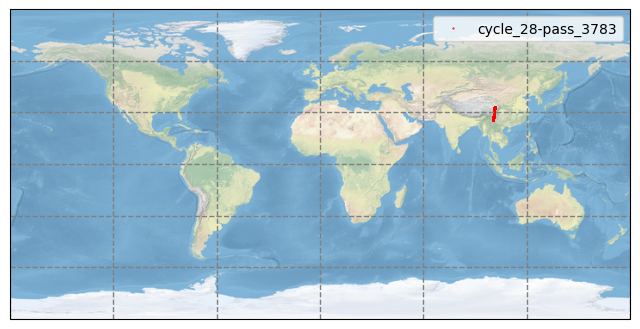

In [10]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=proj)
ax.stock_img()
orbit = 'cycle_'+str(cryo2_sin_l1b.cycle_number)+'-pass_'+str(cryo2_sin_l1b.rel_orbit_number)
ax.plot(cryo2_sin_l1b['lon_20_ku'][:], cryo2_sin_l1b['lat_20_ku'][:], marker='.', markersize=1, 
                                                        linewidth=0.0, label=orbit, color='red')
ax.gridlines(linewidth=1, color='gray', linestyle='--')
ax.legend()


### Visualization from local perspective

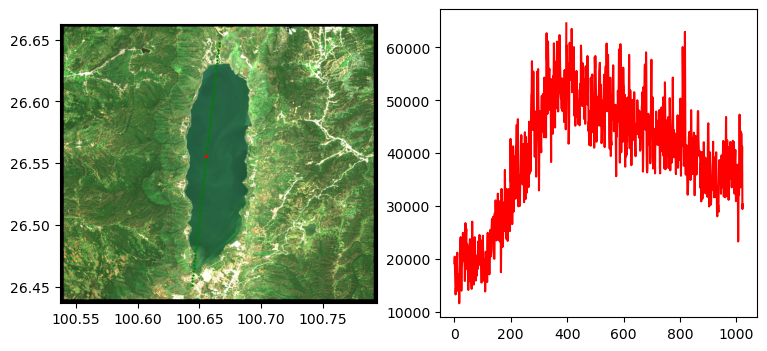

In [32]:
ids = np.where((lat_20_ku_l1b[:]>26.45) & (lat_20_ku_l1b[:]<26.65))[0]  
id = ids[34]
fig, ax = plt.subplots(1,2,figsize=(9,4))
imgShow(rsimg.array, extent=rsimg.geoextent, ax=ax[0])
ax[0].scatter(x=lon_20_ku_l1b[ids], y=lat_20_ku_l1b[ids], s=0.5, color='green')  ## altimetry data
ax[0].scatter(x=lon_20_ku_l1b[id], y=lat_20_ku_l1b[id], s=1.5, color='red')  ## altimetry data
ax[1].plot(waveform_l1b[id], color='red')
